#TIME SERIES ANALYSIS

#Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

##DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP. You can get it in the github repo as well as here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy. 

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


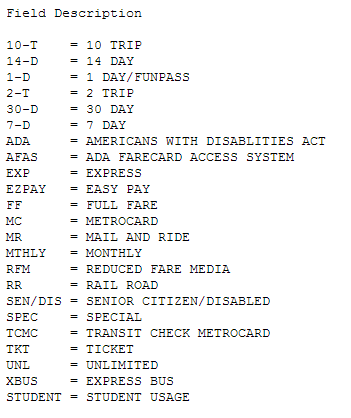

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

Each time series (per station, per ticket type) contains
the number of swipes per week for 194 weeks 
from 05/21/2010 to 02/21/2014. 

The data are available to you as a python data cube here:

you can load it as 

np.load(“MTA_Fare.npy") and 


you will end up with a python numpy array of 
shape (600,23,194)

##note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that! if you replace the -1 entries with NaN remember to use functions that can deal with nans:
np.nanmean
np.nansum...

#Task 1:
#Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
##Identify it and figure out what it is due to.

In [1]:
import numpy as np
import pylab as pl
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rides = np.load('MTA_Fare.npy')
print rides.shape

(600L, 23L, 194L)


In [3]:
print rides

[[[56961 64703 68002 ..., 36527 33929 36824]
  [ 1732  2083  2107 ...,  1264  1172  1238]
  [  203   276   245 ...,   186   167   167]
  ..., 
  [    0     0     0 ...,     0     0     0]
  [    0     0     0 ...,     0     0     0]
  [   -1    -1    -1 ...,  1121  1377   712]]

 [[16210 20179 21769 ...,    -1    -1    -1]
  [  503   647   665 ...,    -1    -1    -1]
  [   41    43    44 ...,    -1    -1    -1]
  ..., 
  [    0     0     0 ...,    -1    -1    -1]
  [    0     0     0 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]]

 [[ 3292  3429  3629 ...,  3746  3406  3217]
  [  110    92   102 ...,   212   209   211]
  [    7     6    13 ...,    26    20    22]
  ..., 
  [    0     0     0 ...,     0     0     0]
  [    0     0     0 ...,     0     0     0]
  [   -1    -1    -1 ...,   573   761   288]]

 ..., 
 [[   -1    -1    -1 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]
  ..., 
  [   -1  

In [3]:
rides = rides.astype(float)
np.around(rides, decimals=2) #need to work on this
rides[rides == -1] = NaN #convert -1 to NaN
print rides

[[[  5.69610000e+04   6.47030000e+04   6.80020000e+04 ...,   3.65270000e+04
     3.39290000e+04   3.68240000e+04]
  [  1.73200000e+03   2.08300000e+03   2.10700000e+03 ...,   1.26400000e+03
     1.17200000e+03   1.23800000e+03]
  [  2.03000000e+02   2.76000000e+02   2.45000000e+02 ...,   1.86000000e+02
     1.67000000e+02   1.67000000e+02]
  ..., 
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [             nan              nan              nan ...,   1.12100000e+03
     1.37700000e+03   7.12000000e+02]]

 [[  1.62100000e+04   2.01790000e+04   2.17690000e+04 ...,              nan
                nan              nan]
  [  5.03000000e+02   6.47000000e+02   6.65000000e+02 ...,              nan
                nan              nan]
  [  4.10000000e+01   4.30000000e+01   4.40000000e+01 ...,              nan
  

In [4]:
import pandas as pd

In [5]:
#this Pandas function returns a fixed frequency datetime index by week ('W')
ridesweek = pd.date_range(start = '2010-05-21', periods = 194, freq = 'W')

In [6]:
# generating sum of 30-day rides because this rider type is probably more likely
# to use the subway on a regular basis
allrides = np.nansum(rides, axis=0)
print allrides

[[  1.14946150e+07   1.25268590e+07   1.27666270e+07 ...,   1.31896100e+07
    1.25007560e+07   1.24599470e+07]
 [  5.30524000e+05   5.83533000e+05   5.86194000e+05 ...,   6.95134000e+05
    6.70228000e+05   6.79497000e+05]
 [  4.78010000e+04   5.14860000e+04   5.16360000e+04 ...,   5.87710000e+04
    5.65250000e+04   5.51920000e+04]
 ..., 
 [  6.12800000e+03   6.12000000e+03   6.49000000e+03 ...,   5.39800000e+03
    5.75900000e+03   6.18400000e+03]
 [  3.58000000e+02   4.74000000e+02   4.65000000e+02 ...,   8.62000000e+02
    8.10000000e+02   8.20000000e+02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.13272300e+06
    1.37940300e+06   5.35018000e+05]]


In [7]:
allrides30 = allrides[4].astype(int) # 4 is 30-day rides
print allrides30
len(allrides30) #checking for 194

[46808 64353 56994 37429 35210 46849 60225 47439 32084 52171 54660 44183
 29340 37160 45464 61920 45491 36554 63071 59699 50235 33666 60117 61981
 55200 24627 47185 64080 59255 30367 12491 12490 60697 57599 44960 32562
 54802 68555 55539 28982 56734 67133 54364 39616 36333 63590 63905 38368
 34643 61061 51641 35431 41360 64671 60152 42711 35097 47115 61586 50756
 37000 55148 56653 44867 33024 30539 53716 65450 51223 28505 63428 60261
 53439 40465 55714 62219 56681 28302 45875 64609 60130 40192 18255 50859
 64966 47341 40972 49666 64156 57871 32709 45688 63539 60167 45975 29874
 54341 54239 53079 41770 53982 61996 51725 39239 30806 62793 63578 48590
 38294 40430 60453 54108 41341 45017 53046 47961 35746 29075 47184 61401
 50015 38444 59403 58438 53340 41177  1268 40602 50779 30331 38773 53768
 55136 43164 14342 34261 57158 51766 34105 36612 53562 55598 35659 38679
 57411 57480 43831 30522 55608 60500 48211 48039 60269 54353 42908 31587
 63083 65707 52399 43035 40856 61801 56877 46590 45

194

In [8]:
# for sigma > 3 
mean30 = np.nanmean(allrides30)
std30 = np.nanstd(allrides30)
limits = (mean30 - std30 * 3, mean30 + std30 * 3) # setting thresholds 

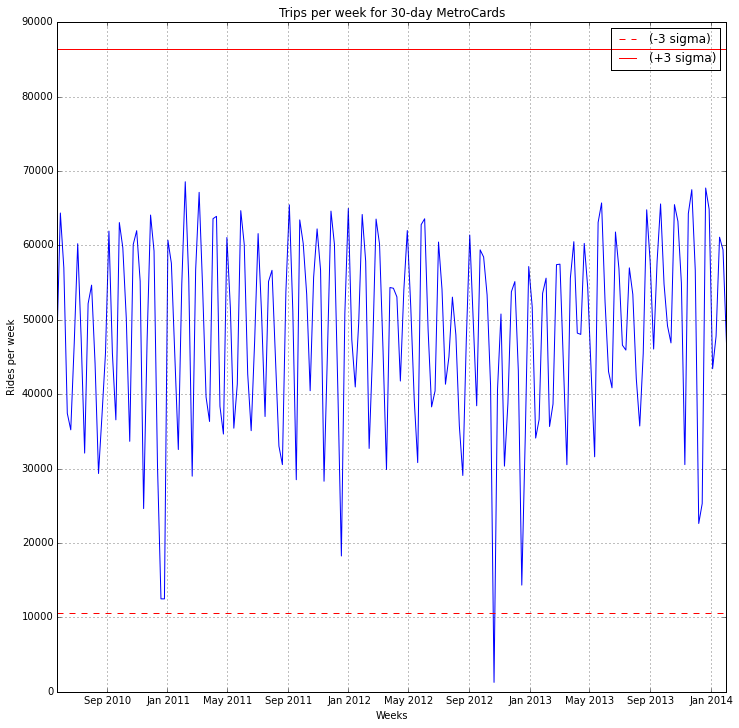

In [9]:
# for plot
fig = pl.figure(figsize=(12, 12))
pl.plot(ridesweek, allrides30)
pl.plot([ridesweek.min(), ridesweek.max()], [
        limits[0], limits[0]], 'r--', label='(-3 sigma)')
pl.plot([ridesweek.min(), ridesweek.max()], [
        limits[1], limits[1]], 'r', label='(+3 sigma)')
pl.title("Trips per week for 30-day MetroCards")
pl.xlabel('Weeks')
pl.ylabel('Rides per week')
pl.grid(True)
pl.legend()

###The drop below -3 sigma just after Sept 2012 was likely the result of Superstorm Sandy's effects on the system.

#Task 2: 
##Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [10]:
rides1 = np.nanmean(rides, axis=0)
print rides1

[[  2.48801190e+04   2.71732299e+04   2.75737084e+04 ...,   2.85489394e+04
    2.69994730e+04   2.69695823e+04]
 [  1.14832035e+03   1.26579826e+03   1.26607775e+03 ...,   1.50461905e+03
    1.44757667e+03   1.47077273e+03]
 [  1.03465368e+02   1.11683297e+02   1.11524838e+02 ...,   1.27209957e+02
    1.22084233e+02   1.19463203e+02]
 ..., 
 [  1.32640693e+01   1.32754881e+01   1.40172786e+01 ...,   1.16839827e+01
    1.24384449e+01   1.33852814e+01]
 [  7.74891775e-01   1.02819957e+00   1.00431965e+00 ...,   1.86580087e+00
    1.74946004e+00   1.77489177e+00]
 [             nan              nan              nan ...,   2.45178139e+03
    2.97927214e+03   1.15804762e+03]]


C:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


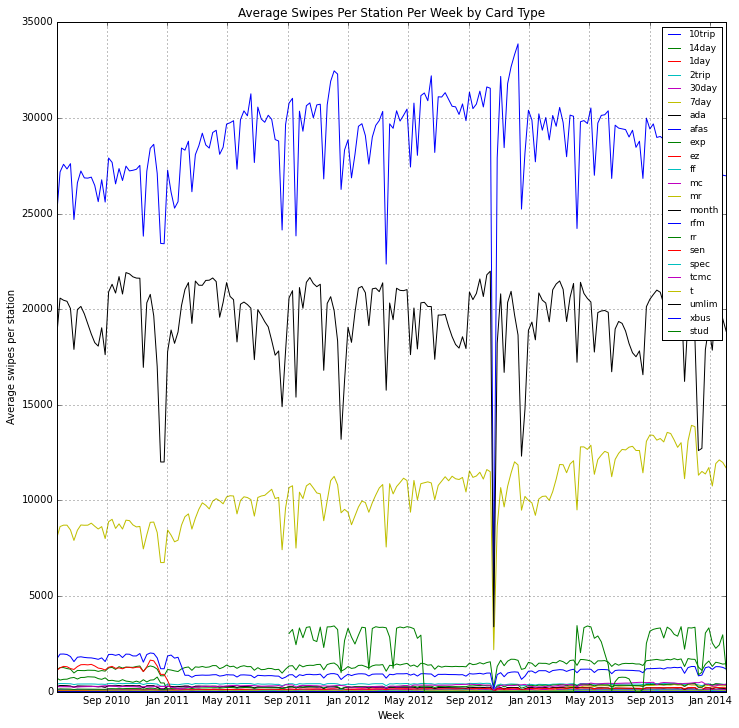

In [11]:
# list of card types for plotting
cardtype = ['10trip', '14day', '1day', '2trip', '30day', '7day', 'ada', 'afas', 'exp', 'ez',
            'ff', 'mc', 'mr', 'month', 'rfm', 'rr', 'sen', 'spec', 'tcmc', 't',
            'umlim', 'xbus', 'stud']

# plotting
fig = pl.figure(figsize=(12, 12))
for i in range(0, len(rides1)):
    pl.plot(ridesweek, rides1[i], label = cardtype[i])
    #pl.legend
pl.title('Average Swipes Per Station Per Week by Card Type')
pl.xlabel('Week')
pl.ylabel('Average swipes per station')
legend = pl.legend(cardtype, prop={'size':9})
frame = legend.get_frame()
frame.set_facecolor('white')
pl.grid(True)

###The 7-day pass (yellow, within the ~7,000 - 13,000 avg rides range) appears to be the only card type displaying an upward usage trend. The other major types demonstrate a sideways trend. Several card types with overall low usage also show a sharp decrease around Jan 2011. Perhaps this was the result of a new rule taking effect at the start of the new year.  

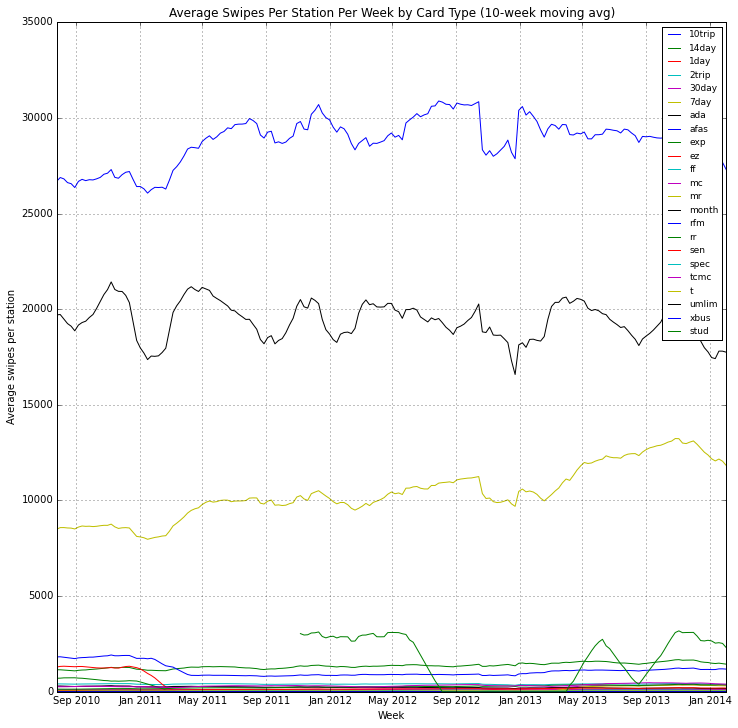

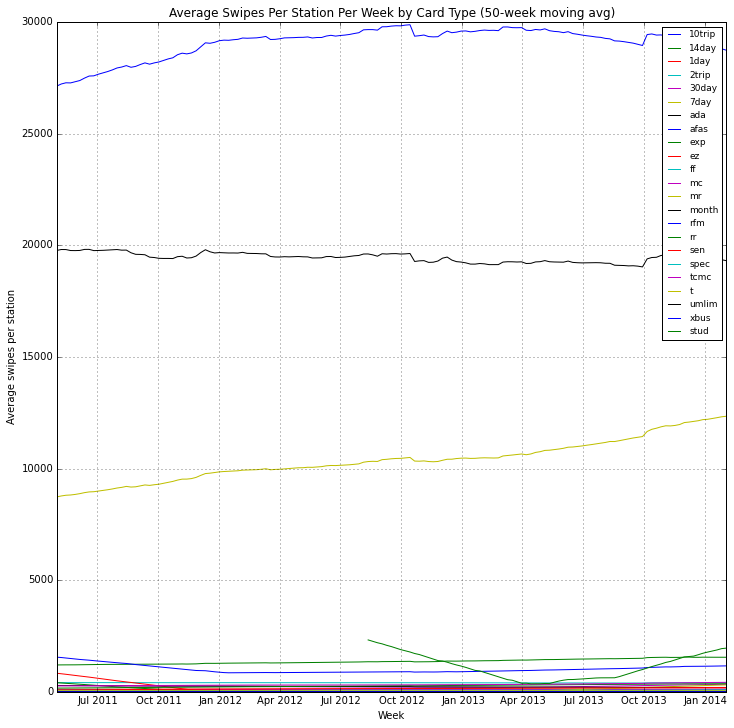

In [12]:
# for removing noise--using rolling averages set to 10, 50 and 100
# just to see what they look like

lowroller = 10
hiroller = 50
skyroller = 100

fig = pl.figure(figsize=(12, 12))
for i in range(0, len(rides1)):
    pl.plot(ridesweek, pd.rolling_mean(pd.DataFrame(rides1[i]),
                                       lowroller),
            label=cardtype[i])
pl.title('Average Swipes Per Station Per Week by Card Type (10-week moving avg)')
pl.xlabel('Week')
pl.ylabel('Average swipes per station')
legend = pl.legend(cardtype, prop={'size':9})
frame = legend.get_frame()
frame.set_facecolor('white')
pl.grid(True) 

fig1 = pl.figure(figsize=(12, 12))
for i in range(0, len(rides1)):
    pl.plot(ridesweek, pd.rolling_mean(pd.DataFrame(rides1[i]),
                                       hiroller),
            label=cardtype[i])
pl.title('Average Swipes Per Station Per Week by Card Type (50-week moving avg)')
pl.xlabel('Week')
pl.ylabel('Average swipes per station')
legend = pl.legend(cardtype, prop={'size':9})
frame = legend.get_frame()
frame.set_facecolor('white')
pl.grid(True)

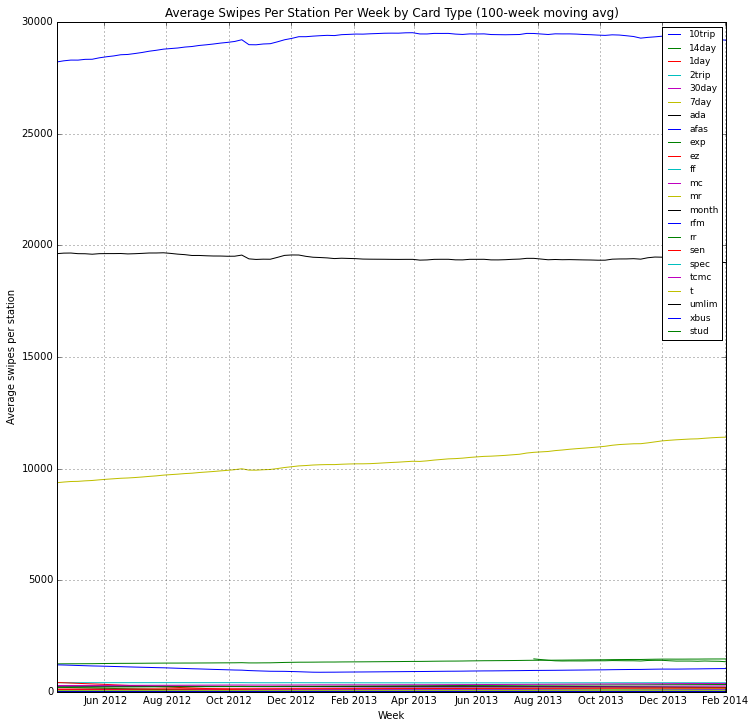

In [13]:
#this is for the 100-week moving average
fig2 = pl.figure(figsize=(12, 12))
for i in range(0, len(rides1)):
    pl.plot(ridesweek, pd.rolling_mean(pd.DataFrame(rides1[i]),
                                       skyroller),
            label=cardtype[i])
pl.title('Average Swipes Per Station Per Week by Card Type (100-week moving avg)')
pl.xlabel('Week')
pl.ylabel('Average swipes per station')
legend = pl.legend(cardtype, prop={'size':9})
frame = legend.get_frame()
frame.set_facecolor('white')
pl.grid(True)

###The 100-week is too smooth.

In [14]:
ratios = pd.DataFrame(index=cardtype)
ratios['start'] = pd.DataFrame([np.nansum(
    rides1[x][:10])/ np.nansum(rides1[:][10:]) for x in range(0, len(rides1))], index=cardtype)
ratios['end'] = pd.DataFrame([np.nansum(
    rides1[x][-10:])/ np.nansum(rides1[:][-10:]) for x in range(0, len(rides1))], index=cardtype)
ratios['difference'] = ratios['end'] - ratios['start']
print ratios.sort('difference')

           start           end  difference
ez      0.017960  3.015598e-08   -0.017960
exp     0.009816  1.172927e-07   -0.009816
rfm     0.025298  1.837737e-02   -0.006921
month   0.004115  2.663304e-03   -0.001452
afas    0.000329  7.708472e-08   -0.000329
ff      0.001237  1.132267e-03   -0.000104
umlim   0.000199  1.796802e-04   -0.000019
xbus    0.000014  2.653347e-05    0.000012
t       0.000633  7.235163e-04    0.000090
30day   0.001438  1.661668e-03    0.000224
2trip   0.005714  5.966392e-03    0.000253
1day    0.001496  1.858728e-03    0.000363
spec    0.000014  1.067905e-03    0.001054
mc      0.003953  5.364777e-03    0.001412
ada     0.273281  2.749885e-01    0.001708
sen     0.000935  3.043382e-03    0.002108
tcmc    0.003623  6.206990e-03    0.002584
rr      0.001934  5.607333e-03    0.003674
mr      0.000000  4.818253e-03    0.004818
14day   0.015987  2.238426e-02    0.006397
stud    0.000000  3.581567e-02    0.035816
10trip  0.370081  4.228812e-01    0.052800
7day    0.1


#Task 3:
##Several stations show a prominent annual periodicity. Identify the 4 **stations** (identify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

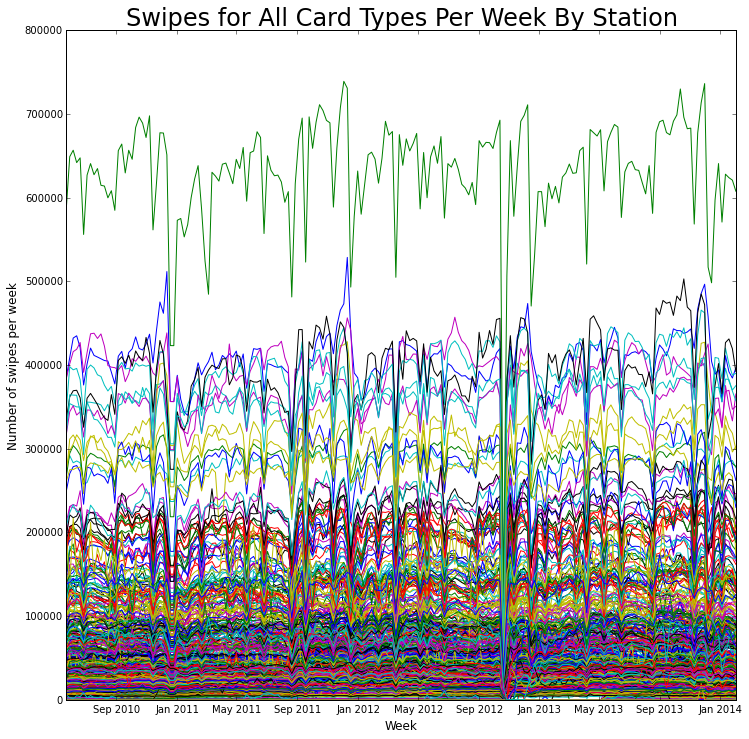

In [15]:
# summing rides
rides2 = pd.DataFrame(np.transpose(np.nansum(rides, axis=1)))

n = len(rides)
fig = pl.figure(figsize =(12,12))
for i in range(0,n):
    pl.plot(ridesweek, rides2[i])
pl.title('Swipes for All Card Types Per Week By Station', size=24)
pl.xlabel('Week', size=12)
pl.ylabel('Number of swipes per week', size=12)

###The above graph demonstrates: 1) that there are many stations, 2) that there are significant usage differences beetween stations, and 3) that ridership fluctuates significantly by station.

####BELOW IS A BAD GRAPH. RERAN IT IN THE CODE JUST BELOW IT.

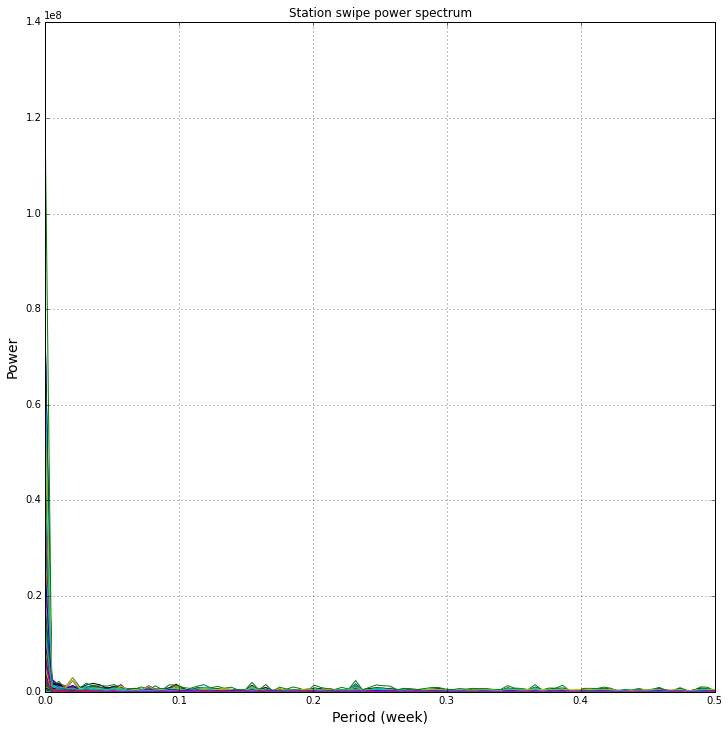

In [16]:
# creating Fourier Transformation
fig = pl.figure(figsize=(12, 12))
for i in range(0, n):
    f = np.abs(np.fft.rfft(rides2[i]))
    # setting sample spacing to a week
    pl.plot(np.fft.rfftfreq(len(rides2), 1.0), f)
pl.title('Station swipe power spectrum')
pl.xlabel('Period (week)', size=14)
pl.ylabel('Power', size=14)
#pl.ylim(ymin= 0, ymax=.2) the first value is messing things up
#and I can't figure out how to limit the y axis w/out receiving
#a 'float' object is not callable. so i will remove the value.
pl.grid(True)

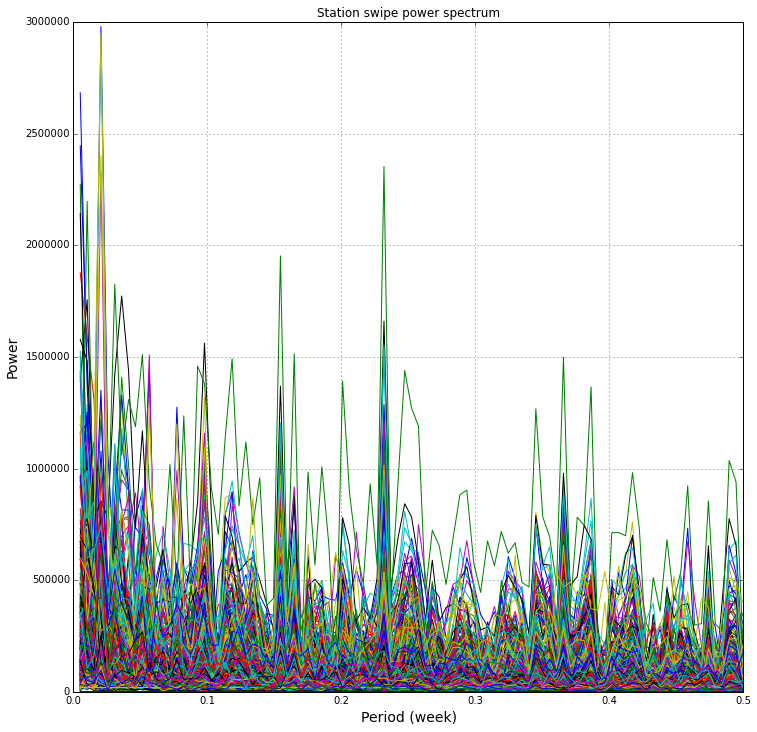

In [17]:
#re-running code in above cell to remove the bad first value
# creating Fourier Transformation
fig = pl.figure(figsize=(12, 12))
for i in range(0, n):
    f = np.abs(np.fft.rfft(rides2[i]))
    # setting sample spacing to a week
    pl.plot(np.fft.rfftfreq(len(rides2), 1.0)[1:], (f[1:]))
pl.title('Station swipe power spectrum')
pl.xlabel('Period (week)', size=14)
pl.ylabel('Power', size=14)
pl.grid(True)

In [18]:
# put FT numbers in a list
ftList = []
for i in range(0, n):
    ft = np.abs(np.fft.rfft(rides2[i]))
    ftList.append(ft)

# list of max value for each station
stationmax = []
for i in range(0, n):
    stationmax.append(ftList[i].max())

# create list of the index of the top 4 stations in the stationmax list
four = sorted(range(len(stationmax)), key=lambda i: stationmax[i])[-4:]
print four

[83, 45, 21, 169]


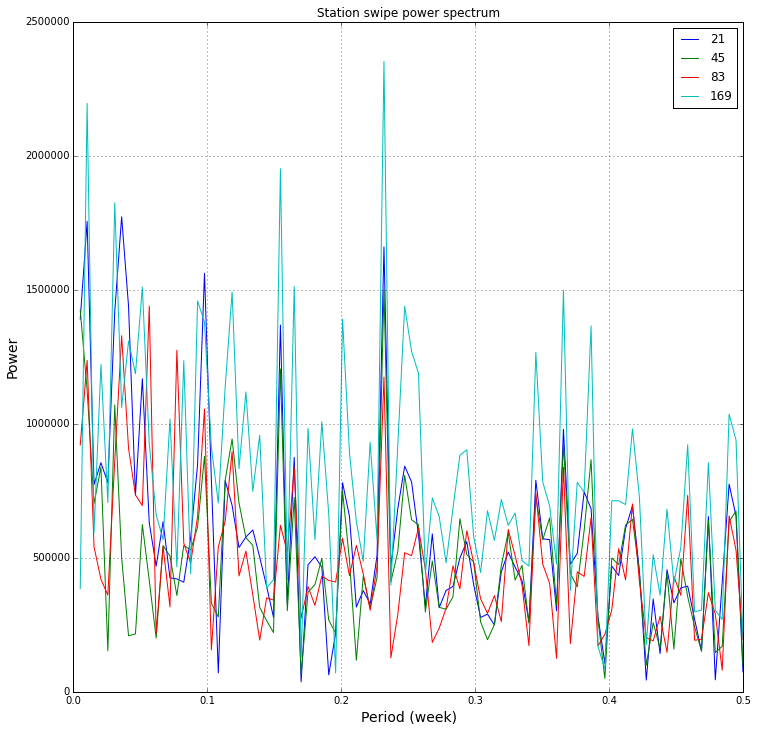

In [19]:
fig = pl.figure(figsize=(12, 12))
for i in four:
    f = np.abs(np.fft.rfft(rides2[i]))
    # setting sample spacing to 1 week
    pl.plot(np.fft.rfftfreq(len(rides2), 1.0)[1:], (f[1:])) #using this same as above
pl.title('Station swipe power spectrum')
pl.xlabel('Period (week)', size=14)
pl.ylabel('Power', size=14)
pl.grid(True)
pl.legend(sorted(four))


#EXTRA CREDIT: Cluster. 
##Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
##Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

##i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

##removing empty light curves
tots = tots[tots.std(1)>0]

##with Kmeans you have to choose the number of clusters ahead km = 

KMeans(n_clusters=10)

##and standardize the lightcurves before clustering
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

##then you can run:

km.fit(vals)

#HINTS: 

##When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average)


#Possibly useful functions

##I used a variety of functions, most of them you are familiar with already. here are a few that you may not have encountered yet which I used. 
##(But you do not have to use them! there are many ways to do things and you do not have to solve this problem like I did)

* the numpy function np.where() returns the index where a condition is true. it is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. if you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft  
     
     np.fft.rfft(mydata) 
     
     will return the fourier transform, but what you want is its absolute value: np.abs(). Then to get the x axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

     np.fft.rfftfreq(N, d) 
     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the Sample spacing, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1)


*  the np.array.flatten() and np.array.reshape() allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which i recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series)



In [5]:
#after reading the datacube you should see:
mta.shape


(600, 23, 194)

ride types list

In [6]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [9]:
#after I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

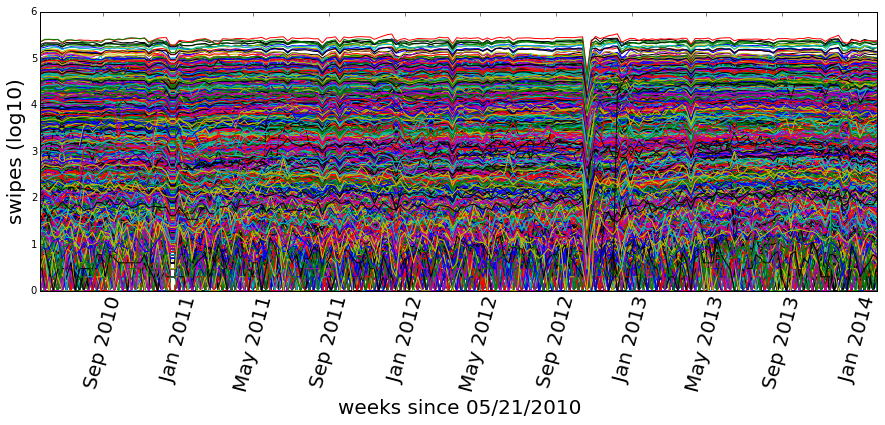

In [6]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mta.shape)
mta_allsum = np.nansum(mta, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mta, axis=1)
print (mta_allsum.shape)



(600, 23, 194)
(23, 194)
(600, 194)


##NOTE ON THE TREND DETECTION:
###you should find the ride type that has the steepest increase, and the steepest decrease. notice: we are looking for something that has a more or less constant trend

###to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

###you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the flux near the beginning to the flux near the end of the time series.

###notice that you should inspect the time series, either algorithmically or by eye, to ensure you see a trend, and not just changing structure.


###below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

std: 153167.095823 
flux ratio beginning to end 1.53960256599
std: 33307.6081244 
flux ratio beginning to end 0.378670623705


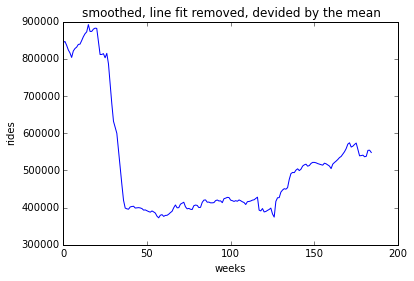

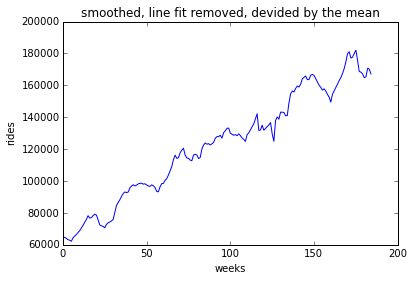

##to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
##an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

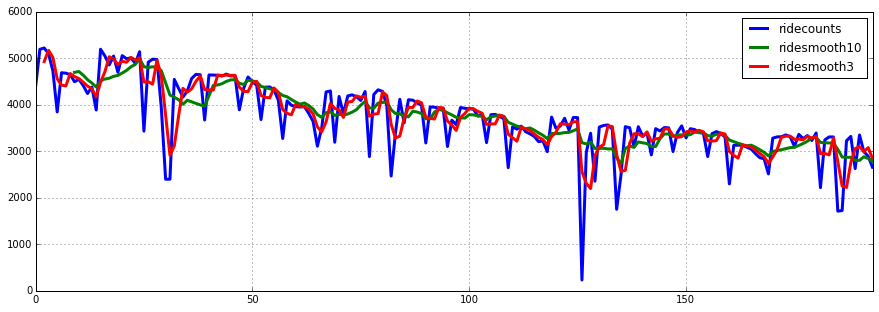

In [14]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

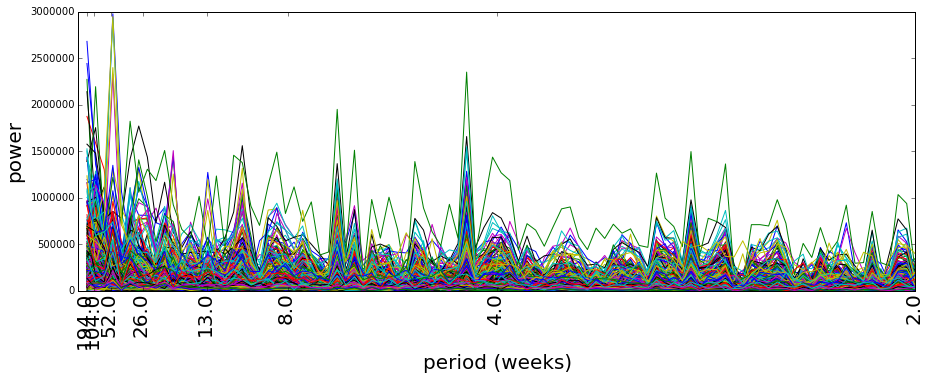

In [51]:
#this is a "power spectrum": the plot of the absolute value of the fourier transform. 
#I changed the xtick labels from frequecy (1/week) to period (in weeks)
#to facilitate the visual identification of the 1-year period peak
#(notice however that np.fft.rfftfreq(N, d)  returns frequency)

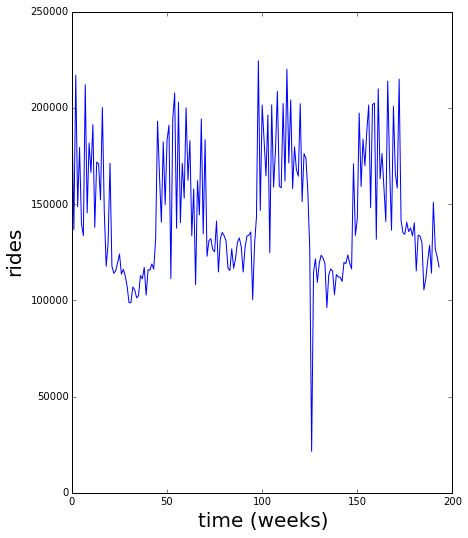

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space